In [2]:
import numpy as np
import pandas as pd
import matplotlib 
import seaborn as sns
from matplotlib import pyplot as plt



In [3]:
dataset=pd.read_csv('winequality-white.csv')
dataset.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


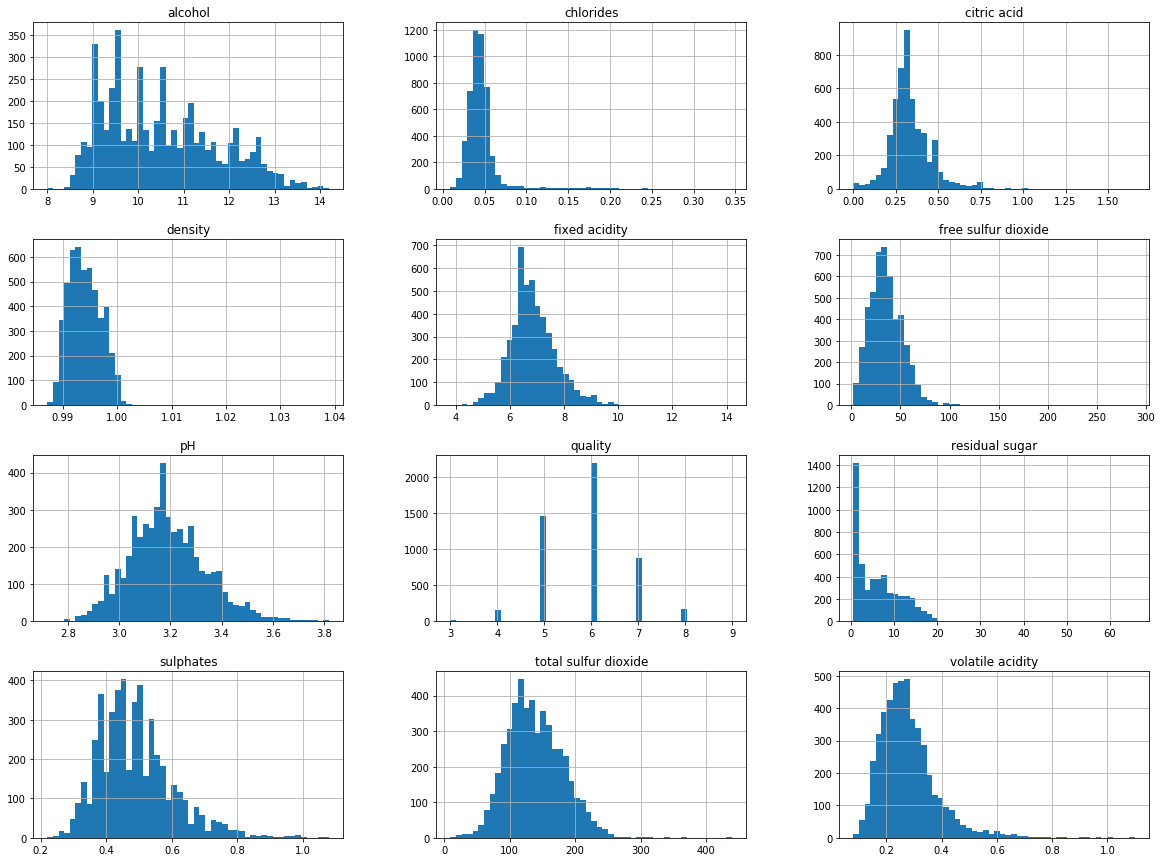

In [4]:
dataset.hist(bins=50, figsize=(20,15))
plt.show()

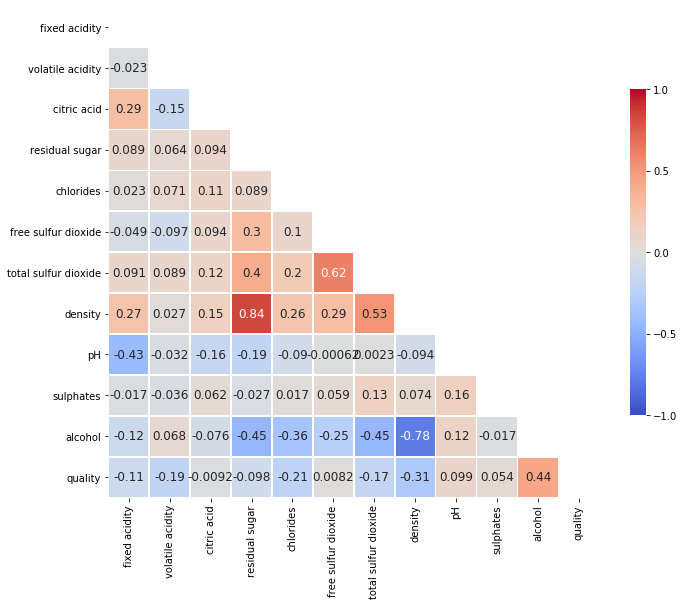

In [5]:
f, ax = plt.subplots(figsize=(11, 15)) 
corr_matrix = dataset.corr()
mask = np.zeros_like(corr_matrix, dtype=np.bool)
mask[np.triu_indices_from(mask)]= True
heatmap = sns.heatmap(corr_matrix, 
                      mask = mask,
                      square = True,
                      linewidths = .5,
                      cmap = 'coolwarm',
                      cbar_kws = {'shrink': .4, 
                                'ticks' : [-1, -.5, 0, 0.5, 1]},
                      vmin = -1, 
                      vmax = 1,
                      annot = True,
                      annot_kws = {"size": 12})
#add the column names as labels
ax.set_yticklabels(corr_matrix.columns, rotation = 0)
ax.set_xticklabels(corr_matrix.columns)
sns.set_style({'xtick.bottom': True}, {'ytick.left': True})

In [6]:
X=pd.DataFrame(dataset[['alcohol','volatile acidity','density','chlorides','total sulfur dioxide']]) # choose only highly correlated variables
X.head()

,alcohol,volatile acidity,density,chlorides,total sulfur dioxide
0,8.8,0.27,1.0010,0.045,170.0
1,9.5,0.30,0.9940,0.049,132.0
2,10.1,0.28,0.9951,0.050,97.0
3,9.9,0.23,0.9956,0.058,186.0
4,9.9,0.23,0.9956,0.058,186.0


In [7]:
y=dataset.quality
y.head()

0    6
1    6
2    6
3    6
4    6
Name: quality, dtype: int64

In [8]:
import sklearn


from sklearn.metrics import precision_score, recall_score, f1_score

# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

#Random Forest Classifier
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', max_depth=10,random_state = 0)
classifier.fit(X_train, y_train)

# Predicting the Test set results
y_pred = classifier.predict(X_test)

# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm_test = confusion_matrix(y_test, y_pred)
print('******Test set confusion matrix************')
print(cm_test)





******Test set confusion matrix************
[[  0   0   5   4   0   0]
 [  1   4  22  23   1   0]
 [  0   0 170 123   2   0]
 [  0   0  59 316  31   3]
 [  0   0   8 105  70   0]
 [  0   0   1  24   4   4]]


In [19]:
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator = classifier, X = X_train, y = y_train, cv = 10)
print('Mean Trainning set accuracy',accuracies.mean())
print('Mean Trainning set std',accuracies.std())

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:657: Warning: The least populated class in y has only 5 members, which is too few. The minimum number of members in any class cannot be less than n_splits=10.
  % (min_groups, self.n_splits)), Warning)


Mean Trainning set accuracy 0.6066890303010065
Mean Trainning set std 0.02057333018065654


In [20]:
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator = classifier, X = X_test, y = y_test, cv = 10)
print('Mean Testing set accuracy',accuracies.mean())
print('Mean Testing set std',accuracies.std())

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:657: Warning: The least populated class in y has only 9 members, which is too few. The minimum number of members in any class cannot be less than n_splits=10.
  % (min_groups, self.n_splits)), Warning)


Mean Testing set accuracy 0.4980592607811835
Mean Testing set std 0.04171939877044843


In [21]:
from sklearn.model_selection import GridSearchCV

param_grid = [
    {'n_estimators': [5, 10, 15,20], 'max_features': [1,2,3,4,5], 'max_depth':[5,10,15],'min_samples_split':[2,5,10],'min_samples_leaf':[1,5,10]},
    {'bootstrap': [False], 'n_estimators': [5, 10, 20], 'max_features': [1,2,3,4,5],'max_depth':[5,10,15],'min_samples_split':[2,5,10],'min_samples_leaf':[1,5,10]}
  ]

grid_search = GridSearchCV(estimator = classifier,
                           param_grid = param_grid,
                           scoring = 'accuracy',
                           cv = 10,
                           n_jobs = -1)
grid_search = grid_search.fit(X_train, y_train)
best_accuracy = grid_search.best_score_
best_parameters = grid_search.best_params_

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:657: Warning: The least populated class in y has only 5 members, which is too few. The minimum number of members in any class cannot be less than n_splits=10.
  % (min_groups, self.n_splits)), Warning)


In [22]:
print( grid_search.best_score_)
print(grid_search.best_params_)

0.6539050535987749
{'bootstrap': False, 'max_depth': 15, 'max_features': 1, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 20}


In [23]:
from sklearn.model_selection import cross_val_score
accuracies_train = cross_val_score(estimator = grid_search.best_estimator_, X = X_train, y = y_train, cv = 10)
accuracies_test = cross_val_score(estimator = grid_search.best_estimator_, X = X_test, y = y_test, cv = 10)
print('Training accuracy mean',accuracies_train.mean())
print('Training accuracy std',accuracies_train.std())
print('Testing accuracy mean',accuracies_test.mean())
print('Testing accuracy std',accuracies_test.std())

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:657: Warning: The least populated class in y has only 5 members, which is too few. The minimum number of members in any class cannot be less than n_splits=10.
  % (min_groups, self.n_splits)), Warning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:657: Warning: The least populated class in y has only 9 members, which is too few. The minimum number of members in any class cannot be less than n_splits=10.
  % (min_groups, self.n_splits)), Warning)


Training accuracy mean 0.6539419191184893
Training accuracy std 0.026639772420084838
Testing accuracy mean 0.5132416054499246
Testing accuracy std 0.03605311250453249
